<a href="https://colab.research.google.com/github/VerlonRoelMBINGUI/AMMI_foundation_Deep-learning/blob/main/Verlon_Roel_MBINGUI__Pytorch_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.utils.data import Dataset

import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch import optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


## load Dataset using pandas

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Pytorch_project1/data.csv')
torch.manual_seed(1242)
np.random.seed(1242)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##Drop the columns id and Unnamed: 32

In [ ]:
data= data.drop(['id','Unnamed: 32'],axis=1)

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## separate your input data and target (the target correspond to the column diagnosis)

In [ ]:
X = data.drop('diagnosis',axis=1)
y = data.diagnosis

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

## Convert your data into numpy arrays

In [ ]:
import numpy as np

In [ ]:
X = np.array(X)
y = np.array(y)

## transform you target values into 0 (for M) and 1 (for B)

In [ ]:
y = np.where(y=='M',0,1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Split your data into train and test sets (20% for test)

In [ ]:
def split_data(x, y):

  ## your code here
  #np.random.seed(0) # To demonstrate that if we use the same seed value twice, we will get the same random number twice
  
  train_size = 0.8
  n = int(len(X)*train_size)
  ind_x = np.arange(len(X))
  np.random.shuffle(ind_x )
  train_idx = ind_x [: n]
  test_idx = ind_x [n:]
  X_train, y_train = X[train_idx], y[train_idx]
  X_test, y_test = X[test_idx], y[test_idx]
  return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = split_data(X, y)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import pandas as pd


Why is it important to scale this data?

##Implement the BreastCancerDataset class that inherit from pytorch Dataset

In [ ]:
class BreastCancerDataset(Dataset):
  def __init__(self,X,y):
    

    self.n_samples = X.shape[0]
    self.X_train = torch.from_numpy(X)#.to(torch.float32) 
    self.y_train = torch.from_numpy(y)#.to(torch.float32) 


  def __getitem__(self, index):
    return self.X_train[index], self.y_train[index]

  
  def __len__(self):
    return self.n_samples

    
 

    

In [ ]:
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
train_dataset = BreastCancerDataset(X_train,y_train) 
test_dataset = BreastCancerDataset(X_test,y_test)

## create dataloader with batch_size 16
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=16,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                          batch_size=16,
                          shuffle=True)
examples = iter(test_loader)
example_data, example_targets = next(examples)
print(example_data.shape)
print(example_targets)

torch.Size([16, 30])
tensor([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])


## Feedforward network

In [ ]:
#b=max(y)+1 in the case of softmax

In [ ]:


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cpu')

In [ ]:
# Fully connected neural network with an input layer, one hidden layer and an output layer
## apply relu between layers
# add Sigmoid  after the output layer
class NeuralNet(nn.Module):
    def __init__(self, input_size,hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        ## add your layers
        self.input_size = input_size
        #linear layer 1
        self.linear1 = nn.Linear(self.input_size, hidden_size )
        ## relu activation 1
        self.relu1 = nn.ReLU()
        #linear layer 2
        self.linear2 = nn.Linear(hidden_size, hidden_size )
        ## relu activation 2
        self.relu2 = nn.ReLU()
        #linear layer 3
        self.linear3 = nn.Linear(hidden_size, num_classes )
        ## relu activation 3
        self.simoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.simoid(out)
        return out

In [ ]:
input_size = X.shape[1]
num_classes = 1
# Hyper-parameters 

hidden_size= 500 

num_epochs = 100
learning_rate = 0.0001
## initialize your model
model = NeuralNet(input_size,hidden_size, num_classes).to(device)


## define a criterion and optimizer

In [ ]:
from torch import optim
#criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Train your model (save the loss in a list and plot it)

In [ ]:
import os
losses=[]
for epoch in range(num_epochs):
  #if os.path.exists("model_verlon.pth"):
    #model.load_state_dict(torch.load('model_verlon.pth'))
  for i, (X,y) in enumerate(train_loader):
    X = X.type((torch.float32)).to(device)
    y = y.type((torch.float32)).to(device)
    
    ### add your training code here
    # Forward pass
    #y_pred = model.forward(X)
    y_pred = model.forward(X)
    #compute the loss
    loss = criterion(y_pred,y.reshape(-1,1))
    #Backward
    loss.backward()
    #updateparameter
    optimizer.step()
    ## zeros the gradient
    optimizer.zero_grad()
  
    #if (i+1) % 10 == 0:
     #print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
  losses.append(loss.item())



## Test the model

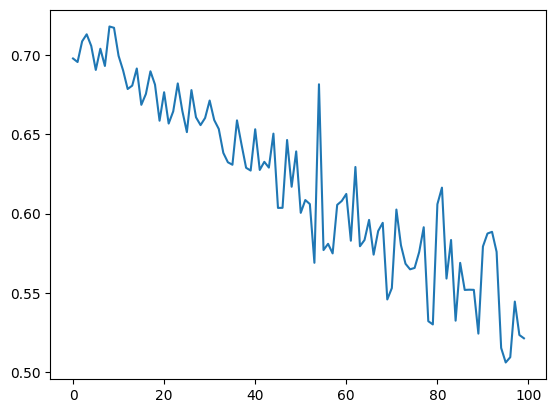

In [ ]:
plt.plot(losses)

In [ ]:
# Remember that in test phase, we don't need to compute gradients 
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for X, y in test_loader:
        X = X.type((torch.float32)).to(device)
        y=y.type((torch.float32)).to(device)
        y_pred = model.forward(X)
        # max returns (value ,index)
        #_, predicted = torch.max(y_pred.data, 1)
        predicted = torch.where(y_pred >= 0.5,1,0).flatten()
        n_samples += y.size(0)
        n_correct += (predicted == y).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the test X: {acc} %')
#compute also the accuracy on your test set

Accuracy of the network on the test X: 94.73684210526316 %


## Saving your model

In [ ]:
## save your model
torch.save(model.state_dict(), 'model_verlon.pth')

## change your activation functions, reimplement your model class with the new activation functions and train the model with the best hyper parameters that you found so far.

Plot the loss during training

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size,hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        ## add your layers
        self.input_size = input_size
        #linear layer 1
        self.linear1 = nn.Linear(self.input_size, hidden_size )
        ## relu activation 1
        self.leaky_relu1 = nn.LeakyReLU(0.2)
        #linear layer 2
        self.linear2 = nn.Linear(hidden_size, hidden_size )
        ## relu activation 2
        self.leaky_relu2 = nn.LeakyReLU(0.2)
        #linear layer 3
        self.linear3 = nn.Linear(hidden_size, num_classes )
        ## relu activation 3
        self.simoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.leaky_relu1(out)
        out = self.linear2(out)
        out = self.leaky_relu2(out)
        out = self.linear3(out)
        out = self.simoid(out)
        return out

In [ ]:
input_size = X.shape[1]
num_classes = 1
# Hyper-parameters 

hidden_size= 500 

num_epochs = 100
learning_rate = 0.0000001
## initialize your model
model1 = NeuralNet(input_size,hidden_size, num_classes).to(device)


In [ ]:
import os
losses=[]
for epoch in range(num_epochs):
  if os.path.exists("model_Roel.pth"):
    model1.load_state_dict(torch.load('model_Roel.pth'))
  for i, (X,y) in enumerate(train_loader):
    X = X.type((torch.float32)).to(device)
    y = y.type((torch.float32)).to(device)
    
    ### add your training code here
    # Forward pass
    #y_pred = model.forward(X)
    y_pred = model1.forward(X)
    #compute the loss
    loss = criterion(y_pred,y.reshape(-1,1))
    #Backward
    loss.backward()
    #updateparameter
    optimizer.step()
    ## zeros the gradient
    optimizer.zero_grad()
  
    if (i+1) % 10 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
  losses.append(loss.item())

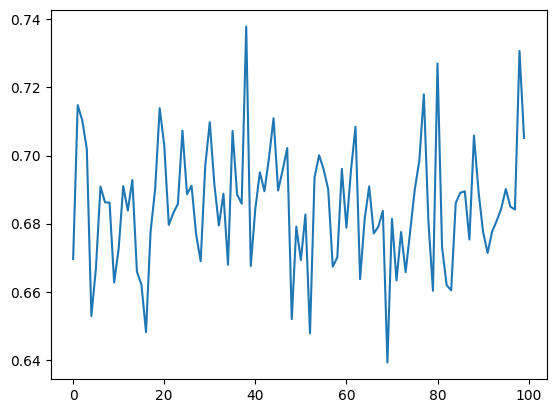

In [ ]:
plt.plot(losses)

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for X, y in test_loader:
        X = X.type((torch.float32)).to(device)
        y=y.type((torch.float32)).to(device)
        y_pred = model1.forward(X)
        # max returns (value ,index)
        #_, predicted = torch.max(y_pred.data, 1)
        predicted = torch.where(y_pred >= 0.5,1,0).flatten()
        n_samples += y.size(0)
        n_correct += (predicted == y).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the test X: {acc} %')

Accuracy of the network on the test X: 61.40350877192982 %


#I. First model
I.1. Activation function : Relu function

I.22. input layer :sigmoid function    output layer : sigmoid function

I.3. criterion (Loss function) : Binary Cross Entropy,  and Stochastic Gradient Descent as a optimizer.  


\\
\begin{array}{cccc}
\text{num_epochs}&\text{learning_rate} &\text{accuracy}&\text{Hidden layer}\\
100 &0.0001&94.73&500\\
20 &0.0001&50.87&500\\
100 &0.01&99.12&500\\
100 &0.0000001&18.42&500
\end{array}

$$Table I.1$$



I.4. Comments: 

When we the values of learning rate is very very small, the occuracy is not significant, but when the values of the learning rate and number of epochs and Hidden layers are large, the accuracy is significant.

#I. Second model
II.1. Activation function : LeakyReLU function

II.22. input layer :sigmoid function    output layer : sigmoid function

II.3. criterion (Loss function) : Binary Cross Entropy,  and Stochastic Gradient Descent as a optimizer.  



\begin{array}{cccc}
\text{num_epochs}&\text{learning_rate} &\text{accuracy}&\text{Hidden layer}\\
100 &0.0001&40.35&500\\
20 &0.0001&48.24&50\\
100 &0.0000001&61.40&500\\
100 &0.01&53.50&500
\end{array}

$$Table II.1$$



II.4. Comments:

In this case when the value of the learning is very small, the accuracy is more significant.

# Conclusion 
Whe we use the  relu function as a activation, we obtain a more significant accuracy than we use the Leaky relu function as an activation function.